In [1]:
import pandas as pd
import numpy as np
import os

# Ele verifica se o diretório 'data_lake' existe e, se não existir, ele vai criar
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

# Números de arquivo e Números de linhas por arquivos
num_files = 10
num_rows_per_file = 1000

# Lista para armazenar os nomes dos arquivos
dfs = []

#  Um for (Loop) para gerar os dados e salvar em arquivos CSV
for i in range(num_files):
  # Geração de dados aleatórios para as colunas
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
  }

  # Criação do DataFrame a partir dos dados gerados
  df = pd.DataFrame(data)

  # Salvar o arquivo em CSV
  file_name = f'data_lake/dados_{i+1}.csv'
  df.to_csv(file_name, index=False)

  # Adiciona o nome do arquivo e o DataFrame à lista
  dfs.append((file_name, df))

print("Dados do Date Lake gerados com Sucesso!")

# Exibe os primeiros registros de cada DataFrame gerado
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())




Dados do Date Lake gerados com Sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       90 -0.108205       A
1       21  1.424308       B
2        2 -1.169769       C
3       12 -1.009894       B
4       44  0.270580       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       76  1.297703       A
1        2 -0.634496       B
2       97  0.220493       A
3       99 -1.165871       B
4       96  2.119388       C

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0        7 -0.247723       A
1       98 -1.578685       C
2       63  0.699562       A
3       16 -0.446479       B
4       32  0.050911       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       28 -0.494204       A
1       26 -1.445369       A
2       23 -0.000214       A
3       14  0.644994       A
4       34 -2.589118       C

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       13 -1.346802     

Primeiras linhas do DataFrame: 
   coluna1   coluna2 coluna3
0       18 -1.026616       A
1       12 -0.336772       A
2       98  0.426633       B
3       12  0.943378       C
4       26  0.979745       A

 Informações sobre o DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

 Resumo estatístico do DataFrame: 
          coluna1      coluna2
count  1000.00000  1000.000000
mean     49.17000    -0.025577
std      28.61489     0.953506
min       0.00000    -3.020254
25%      24.00000    -0.671317
50%      49.00000    -0.028229
75%      74.25000     0.629768
max      99.00000     3.072654


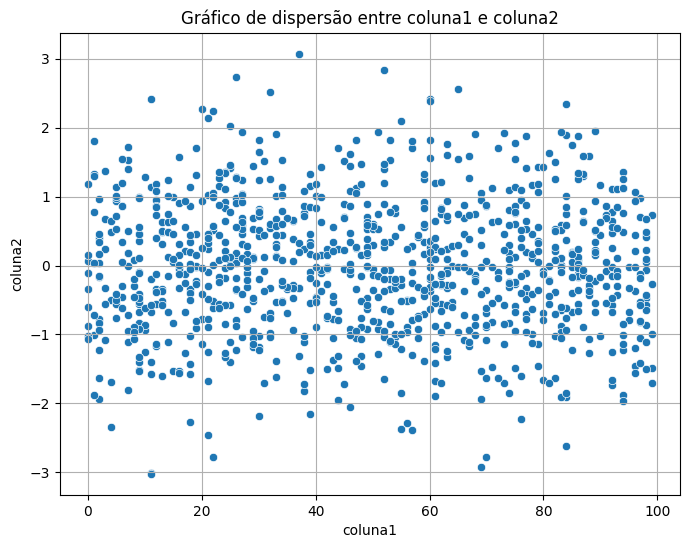

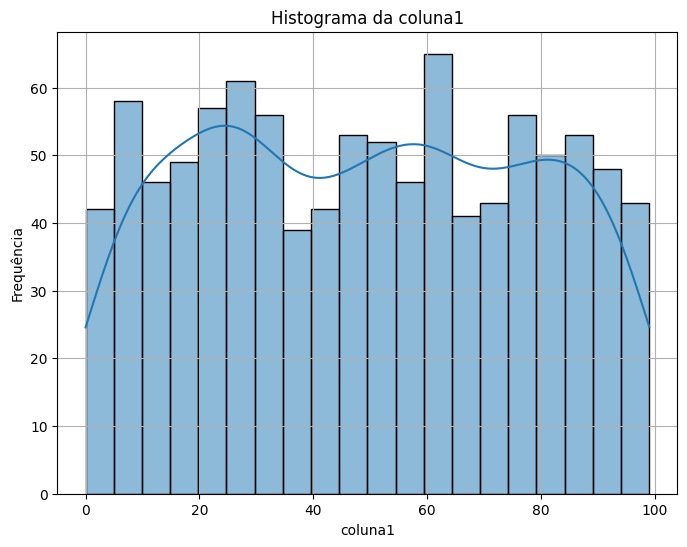

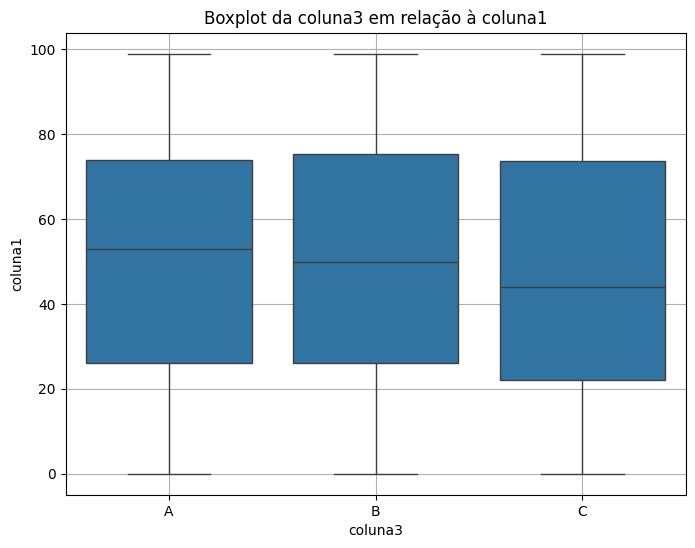

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# String de conexão com o banco de dados SQLite
conn_string = 'sqlite:///data.lake.db'
# Criação de uma engine para conectar ao banco de dados
engine = create_engine(conn_string)

# Nome da tabela que será lida do banco de dados
table_name = 'dados_1'
# Leitura dos dados da tabela para um DataFrame
#df = pd.read_sql_table(table_name, engine)

# Exibe as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame: ")
print(df.head())

# Exibe informações sobre o DataFrame, como tipos de dados e número de entradas não nulas
print("\n Informações sobre o DataFrame: ")
print(df.info())

# Exibe um resumo estatístico das colunas numéricas do DataFrame
print("\n Resumo estatístico do DataFrame: ")
print(df.describe())

# Criação de um gráfico de dispersão entre coluna1 e coluna2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criação de um histograma da coluna1
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criação de um boxplot da coluna3 em relação à coluna1
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
